In [54]:
#!pip install tensorflow
#!pip install mlxtend

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.framework import ops
from mlxtend.plotting import plot_decision_regions
ops.reset_default_graph()

# LOGISTIC REGRESSION

In this notebook we will apply logistic regression to a linearly separable dataset of two classes.

The notebook will help us to better understand logistic regression and why it can be perceived as a baby neural net.

The most important part of this notebook is to identify the ingredientes of logistic regression as well as to understand the mechanism logistic regression is using to classify the points.

## 1. Artificially create a linearly separable dataset with two classes.

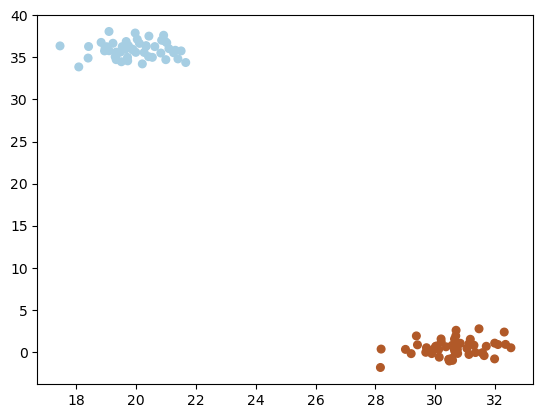

In [56]:
# We randomly generate datapoints from two different gaussians.
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 50))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

## 2. Create the Logistic Regression Model Structure.

We will use keras to create our Logistic Regresson Model. Specifically we will use the class Sequential, where we can create a model layer by layer -- this would be specially interesting where working with neural nets.

There are different types of layers. We will use two in particular, the layer Input (just for holding our input vectors) and the Layer "Dense". A "Dense layer" indicates that the units of the layer are fully connected with the input layer units https://keras.io/api/layers/core_layers/dense/

For further information please have a look into the keras documentation

https://keras.io/api/layers/

In [57]:
binary_logistic_regressor = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"), 
    layers.Dense(units=4, activation="sigmoid"),                                       
    layers.Dense(units=2, activation="softmax", name="output")
])

In [58]:
# we can use the summary function to inspect the layers of our model 
binary_logistic_regressor.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

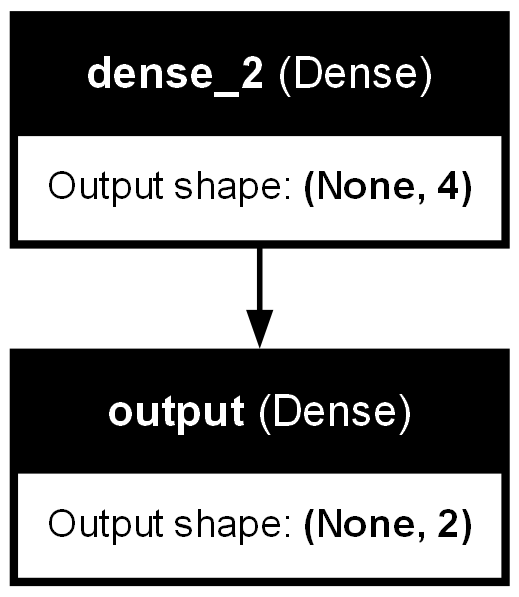

In [59]:
tf.keras.utils.plot_model(binary_logistic_regressor, show_layer_names=True, show_shapes=True)

## 3. Compiling the model

Now that we have an structure we need to complete the model. So far, we have how the inputs and outputs will be and how they relate (through the mapping function/structure that we create).

Now we need the cost function to measure how well or bad we are doing the things and the learning procedure. We do this through the 'compile' function.

Also we include the kind of metric we want to assess. In this case "accuracy"


In [60]:
binary_logistic_regressor.compile(optimizer='sgd', 
                                  loss= tf.keras.losses.SparseCategoricalCrossentropy(), 
                                  metrics=['accuracy'])

## 4. Training the model

The infamous fit! This basically will run our learning procedure (which it is iterative) over our training dataset, and evaluate over the validation one. 

In [61]:
history = binary_logistic_regressor.fit(X, y, epochs=100, verbose=0, validation_split = 0.2)

## 5. See how it was the run...

In [62]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.4875,0.605438,0.55,0.558478,0
1,0.4875,0.599752,0.55,0.553699,1
2,0.4875,0.593677,0.55,0.549508,2
3,0.4875,0.588542,0.55,0.545714,3
4,0.4875,0.583707,0.55,0.541432,4
...,...,...,...,...,...
95,1.0000,0.379307,1.00,0.371179,95
96,1.0000,0.377863,1.00,0.369890,96
97,1.0000,0.376567,1.00,0.368713,97
98,1.0000,0.375187,1.00,0.367477,98


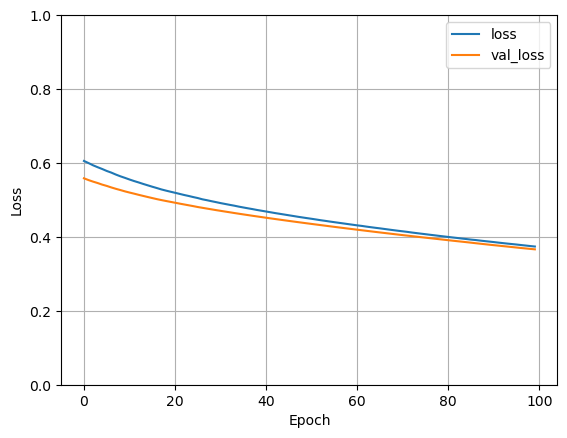

In [63]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
plot_loss(history)

## 6. Dig a litte bit further into the model and plot the boundary

In [64]:
binary_logistic_regressor.trainable_variables


[<KerasVariable shape=(2, 4), dtype=float32, path=sequential_2/dense_2/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_2/bias>,
 <KerasVariable shape=(4, 2), dtype=float32, path=sequential_2/output/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=sequential_2/output/bias>]

In [65]:
w1 = binary_logistic_regressor.trainable_variables[0][0]
print(w1)
w2 = binary_logistic_regressor.trainable_variables[0][1]
print(w2)
b = binary_logistic_regressor.trainable_variables[1][0]
print(b)

weights = binary_logistic_regressor.get_weights()[0]  # Weight matrix of shape (2, 4)
bias = binary_logistic_regressor.get_weights()[1]     # Bias vector of shape (4,)


tf.Tensor([-0.23231843 -0.9488025  -0.82735133  0.17078096], shape=(4,), dtype=float32)
tf.Tensor([ 0.32359722  0.01434207 -0.08806944  0.4987091 ], shape=(4,), dtype=float32)
tf.Tensor(-0.0003004607, shape=(), dtype=float32)


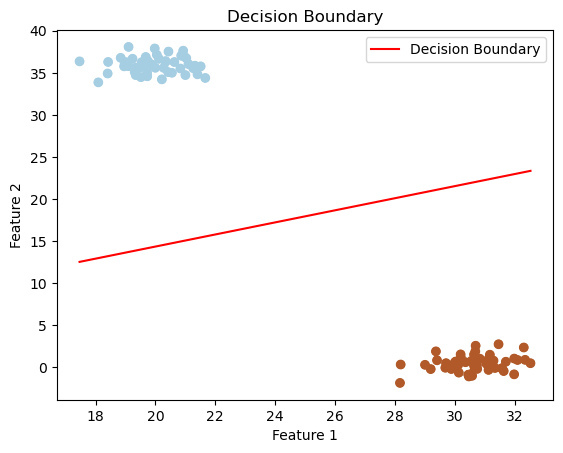

In [66]:
plot = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plot.axes
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = (-weights[0, 0] * x_values - bias[0]) / weights[1, 0]
plt.plot(x_values, y_values, label='Decision Boundary', color='r')

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.show()
#x_boundary = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1])
#y_boundary = -w1/w2*x_boundary - b/w2
# plt.ylim(ax.get_ylim()[0], ax.get_ylim()[1])
# plt.xlim(ax.get_xlim()[0], ax.get_xlim()[1])
# plt.plot(x_boundary, y_boundary, '-r')

In [67]:
# # Just another way to plot the boundary, this time using contour

# plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# # plot the decision function
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = (w1*XX + w2*YY + b)
# # plot decision boundary and margins
# ax.contour(XX, YY, Z, colors='k', levels=[0], linestyles='-')
# plt.show()

In [68]:
# ax = plt.axes(projection='3d')
# zz = np.linspace(-15, 15, 30)
# ax.scatter3D(X[:, 0], X[:, 1], w1*X[:, 0] + w2*X[:, 1] + b, c=y, s=30, cmap=plt.cm.Paired)


In [69]:
# from numpy import array, exp

# def sigmoid(x):
#   return 1 / (1 + exp(-x))

# ax = plt.axes(projection='3d')
# ax.scatter3D(X[:, 0], X[:, 1], 
#              sigmoid(w1*X[:, 0] + w2*X[:, 1] + b), c=y, s=30, cmap=plt.cm.Paired)

In [70]:
# output = sigmoid(w1*X[:, 0] + w2*X[:, 1] + b)
# plt.hist(output, bins='auto')



In [71]:
# # Lets take now a single datapoint of the datase of the class 1
# print(X[1,:])
# print(y[1])

In [72]:
# # if we plug this value into our model (without the sigmoid) we obtain the following
# y_ = w1*X[1,0] + w2*X[1,1] + b
# print(y_)

In [73]:
# so if we apply the sigmoid, which is finally the decisor, we have almost a 1. 
# we interpret this as there is a 99.46 probability of this datapoint to belong 
# to the class 1

#sigmoid(y_)

#Plotting the boundary using mlxtend

In [74]:
# # Test the model after training
# test_results = binary_logistic_regressor.evaluate(X, y, verbose=1)
# print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [75]:
# plot_decision_regions(X, y, clf=binary_logistic_regressor, legend=2)
# plt.show()